# Meal Forecast Dev

https://www.kaggle.com/datasets/ghoshsaptarshi/av-genpact-hack-dec2018/data



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ls ../../data/kaggle

fulfilment_center_info.csv  test.csv
meal_info.csv               train.csv


In [3]:
cat ../../data/kaggle/fulfilment_center_info.csv

center_id,city_code,region_code,center_type,op_area
11,679,56,TYPE_A,3.7
13,590,56,TYPE_B,6.7
124,590,56,TYPE_C,4
66,648,34,TYPE_A,4.1
94,632,34,TYPE_C,3.6
64,553,77,TYPE_A,4.4
129,593,77,TYPE_A,3.9
139,693,34,TYPE_C,2.8
88,526,34,TYPE_A,4.1
143,562,77,TYPE_B,3.8
101,699,85,TYPE_C,2.8
86,699,85,TYPE_C,4
32,526,34,TYPE_A,3.8
149,478,77,TYPE_A,2.4
152,576,34,TYPE_B,4
92,526,34,TYPE_C,2.9
27,713,85,TYPE_A,4.5
14,654,56,TYPE_C,2.7
26,515,77,TYPE_C,3
104,647,56,TYPE_A,4.5
77,676,34,TYPE_A,3.8
23,698,23,TYPE_A,3.4
97,628,77,TYPE_A,4.6
146,526,34,TYPE_B,5
113,680,77,TYPE_C,4
145,620,77,TYPE_A,3.9
80,604,56,TYPE_C,5.1
55,647,56,TYPE_C,2
186,649,34,TYPE_A,3.4
99,596,71,TYPE_A,4.5
91,590,56,TYPE_C,0.9
20,522,56,TYPE_A,4
106,675,34,TYPE_A,4
81,526,34,TYPE_A,4
73,576,34,TYPE_A,4
29,526,34,TYPE_C,4
43,590,56,TYPE_A,5.1
102,593,77,TYPE_A,2.8
61,473,77,TYPE_A,4.5
50,556,77,TYPE_A,4.8
83,659,77,TYPE_A,5.3
57,541,77,TYPE_C,2.8
126,577,56,TYPE_A,2.7
177,683,56,TYPE_A,3.4
67,638,56,TYPE_B,7
174,700,56,TY

In [4]:
cat ../../data/kaggle/meal_info.csv

meal_id,category,cuisine
1885,Beverages,Thai
1993,Beverages,Thai
2539,Beverages,Thai
1248,Beverages,Indian
2631,Beverages,Indian
1311,Extras,Thai
1062,Beverages,Italian
1778,Beverages,Italian
1803,Extras,Thai
1198,Extras,Thai
2707,Beverages,Italian
1847,Soup,Thai
1438,Soup,Thai
2494,Soup,Thai
2760,Other Snacks,Thai
2490,Salad,Italian
1109,Rice Bowl,Indian
2290,Rice Bowl,Indian
1525,Other Snacks,Thai
2704,Other Snacks,Thai
1878,Starters,Thai
2640,Starters,Thai
2577,Starters,Thai
1754,Sandwich,Italian
1971,Sandwich,Italian
2306,Pasta,Italian
2139,Beverages,Indian
2826,Sandwich,Italian
2664,Salad,Italian
2569,Salad,Italian
1230,Beverages,Continental
1207,Beverages,Continental
2322,Beverages,Continental
2492,Desert,Indian
1216,Pasta,Italian
1727,Rice Bowl,Indian
1902,Biryani,Indian
1247,Biryani,Indian
2304,Desert,Indian
1543,Desert,Indian
1770,Biryani,Indian
2126,Pasta,Italian
1558,Pizza,Continental
2581,Pizza,Continental
1962,Pizza,Continental
1571,Fish,Continental
2956,Fish,Continental
2

## Load data

In [5]:
df_center_info = pd.read_csv("../../data/kaggle/fulfilment_center_info.csv")
df_meal_info = pd.read_csv("../../data/kaggle/meal_info.csv")
df_train_raw = pd.read_csv("../../data/kaggle/train.csv")
df_test_raw = pd.read_csv("../../data/kaggle/test.csv")

## EDA

In [6]:
df = df_train_raw.copy()

In [7]:
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [8]:
df = pd.merge(df, df_center_info, on="center_id")
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,TYPE_A,4.5
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,TYPE_A,4.5
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,77,TYPE_A,4.5
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,77,TYPE_A,4.5


In [9]:
df = pd.merge(df, df_meal_info, on="meal_id")
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,TYPE_A,4.5,Desert,Indian
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,TYPE_A,4.5,Desert,Indian
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,77,TYPE_A,4.5,Salad,Italian
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,77,TYPE_A,4.5,Salad,Italian


In [10]:
df.center_type.value_counts()

center_type
TYPE_A    262881
TYPE_C     99593
TYPE_B     94074
Name: count, dtype: int64

<Axes: >

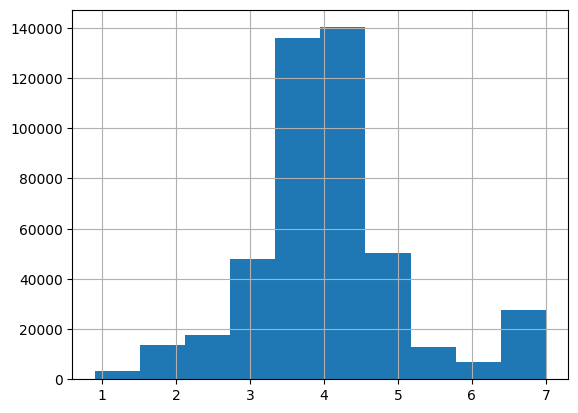

In [11]:
df["op_area"].hist()

<Axes: >

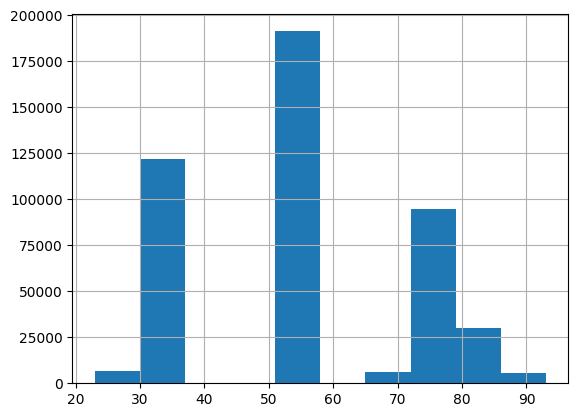

In [12]:
df.region_code.hist()

In [13]:
[col for col, val in df.dtypes.reset_index().values if val in ("int","float")]

['id',
 'week',
 'center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'num_orders',
 'city_code',
 'region_code',
 'op_area']

<Axes: >

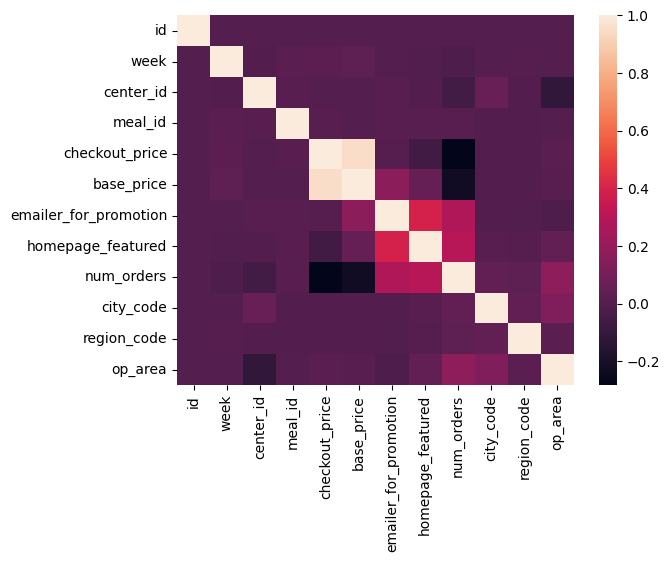

In [14]:
sns.heatmap(df[[col for col, val in df.dtypes.reset_index().values if val in ("int","float")]].corr())

<Axes: xlabel='base_price', ylabel='center_type'>

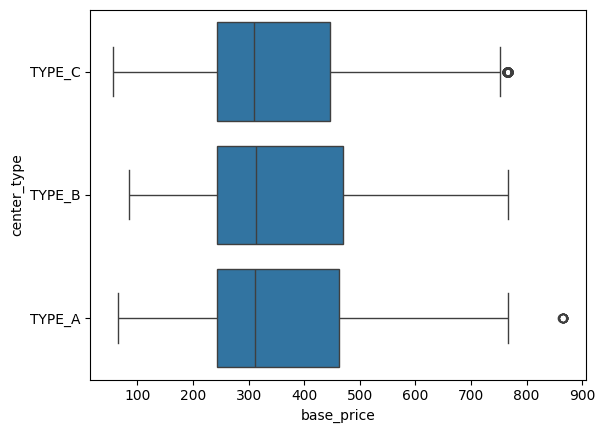

In [15]:
sns.boxplot(df, x="base_price", y="center_type")

<Axes: xlabel='num_orders', ylabel='center_type'>

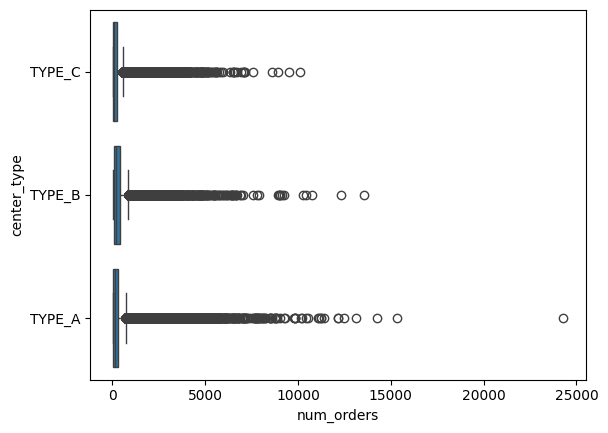

In [16]:

sns.boxplot(df, x="num_orders", y="center_type")

(0.0, 1000.0)

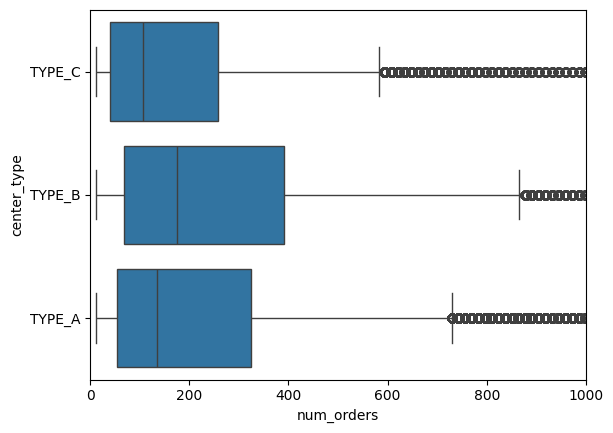

In [17]:
sns.boxplot(df, x="num_orders", y="center_type")
plt.xlim(0,1000)

In [18]:
df.emailer_for_promotion.value_counts()

emailer_for_promotion
0    419498
1     37050
Name: count, dtype: int64

In [19]:
df.homepage_featured.value_counts()

homepage_featured
0    406693
1     49855
Name: count, dtype: int64

## Timeseries features

In [20]:
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,TYPE_A,4.5,Desert,Indian
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,TYPE_A,4.5,Desert,Indian
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,77,TYPE_A,4.5,Salad,Italian
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,77,TYPE_A,4.5,Salad,Italian


In [21]:
# Num orders from past week
df["num_orders_shift_1"] = df.groupby(["center_id", "meal_id"]).num_orders.shift(1)
df["num_orders_shift_1"]

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
456543    123.0
456544     13.0
456545    770.0
456546    811.0
456547    190.0
Name: num_orders_shift_1, Length: 456548, dtype: float64

In [22]:
# Num orders same week last year
df["num_orders_shift_52"] = df.groupby(["center_id", "meal_id"]).num_orders.shift(52)
df["num_orders_shift_52"]

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
456543     27.0
456544     28.0
456545    244.0
456546    540.0
456547    256.0
Name: num_orders_shift_52, Length: 456548, dtype: float64

In [23]:
# Num orders rolling average past 4 weeks
df["num_orders_rolling_4"] = df.groupby(["center_id", "meal_id"]).num_orders.rolling(4).mean().reset_index(drop=True)
df["num_orders_rolling_4"]

0            NaN
1            NaN
2            NaN
3         925.00
4         948.25
           ...  
456543     58.25
456544     57.75
456545     51.00
456546     41.00
456547     51.00
Name: num_orders_rolling_4, Length: 456548, dtype: float64

In [24]:
# Num orders rolling average past 16 weeks
df["num_orders_rolling_16"] = df.groupby(["center_id", "meal_id"]).num_orders.rolling(16).mean().reset_index(drop=True)
df["num_orders_rolling_16"]

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
456543    39.8750
456544    41.5625
456545    40.6875
456546    40.8125
456547    45.8125
Name: num_orders_rolling_16, Length: 456548, dtype: float64

In [25]:
# Num order rolling averages from same week last year
df["num_orders_rolling_4_shift_52"] = df.groupby(["center_id", "meal_id"]).num_orders_rolling_4.shift(52)
df["num_orders_rolling_16_shift_52"] = df.groupby(["center_id", "meal_id"]).num_orders_rolling_16.shift(52)

In [26]:
df.isnull().sum() / len(df)

id                                0.000000
week                              0.000000
center_id                         0.000000
meal_id                           0.000000
checkout_price                    0.000000
base_price                        0.000000
emailer_for_promotion             0.000000
homepage_featured                 0.000000
num_orders                        0.000000
city_code                         0.000000
region_code                       0.000000
center_type                       0.000000
op_area                           0.000000
category                          0.000000
cuisine                           0.000000
num_orders_shift_1                0.007879
num_orders_shift_52               0.402207
num_orders_rolling_4              0.023623
num_orders_rolling_16             0.117574
num_orders_rolling_4_shift_52     0.416353
num_orders_rolling_16_shift_52    0.472594
dtype: float64

## Boosted tree

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

In [28]:
df.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'center_type', 'op_area', 'category', 'cuisine',
       'num_orders_shift_1', 'num_orders_shift_52', 'num_orders_rolling_4',
       'num_orders_rolling_16', 'num_orders_rolling_4_shift_52',
       'num_orders_rolling_16_shift_52'],
      dtype='object')

In [29]:
df.dtypes

id                                  int64
week                                int64
center_id                           int64
meal_id                             int64
checkout_price                    float64
base_price                        float64
emailer_for_promotion               int64
homepage_featured                   int64
num_orders                          int64
city_code                           int64
region_code                         int64
center_type                        object
op_area                           float64
category                           object
cuisine                            object
num_orders_shift_1                float64
num_orders_shift_52               float64
num_orders_rolling_4              float64
num_orders_rolling_16             float64
num_orders_rolling_4_shift_52     float64
num_orders_rolling_16_shift_52    float64
dtype: object

In [30]:
target = "num_orders"
numeric_features = ["checkout_price", "base_price", "emailer_for_promotion", "homepage_featured", "num_orders_shift_1", "num_orders_shift_52", "num_orders_rolling_4", "num_orders_rolling_16", "num_orders_rolling_4_shift_52", "num_orders_rolling_16_shift_52"]
ohe_features = ["city_code", "region_code", "center_type", "op_area", "category", "cuisine"]

In [31]:
df[numeric_features]

,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders_shift_1,num_orders_shift_52,num_orders_rolling_4,num_orders_rolling_16,num_orders_rolling_4_shift_52,num_orders_rolling_16_shift_52
0,136.83,152.29,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,136.83,135.83,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,134.86,135.86,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,339.50,437.53,0,0,NaN,NaN,925.00,NaN,NaN,NaN
4,243.50,242.50,0,0,NaN,NaN,948.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
456543,484.09,484.09,0,0,123.0,27.0,58.25,39.8750,219.50,138.5000
456544,482.09,482.09,0,0,13.0,28.0,57.75,41.5625,207.00,241.5625
456545,237.68,321.07,0,0,770.0,244.0,51.00,40.6875,121.50,180.2500
456546,243.50,313.34,0,0,811.0,540.0,41.00,40.8125,111.25,180.2500


In [32]:
df[ohe_features]

,city_code,region_code,center_type,op_area,category,cuisine
0,647,56,TYPE_C,2.0,Beverages,Thai
1,647,56,TYPE_C,2.0,Beverages,Thai
2,647,56,TYPE_C,2.0,Beverages,Thai
3,647,56,TYPE_C,2.0,Beverages,Indian
4,647,56,TYPE_C,2.0,Beverages,Indian
...,...,...,...,...,...,...
456543,473,77,TYPE_A,4.5,Desert,Indian
456544,473,77,TYPE_A,4.5,Desert,Indian
456545,473,77,TYPE_A,4.5,Salad,Italian
456546,473,77,TYPE_A,4.5,Salad,Italian


In [33]:
# One-hot encode
encoders = {}
for col in ohe_features:
    ohe = OneHotEncoder()
    ohe.fit(df[[col]].values)
    encoders[col] = ohe



In [34]:
ohe_dfs = []
for col, ohe in encoders.items():
    X_ohe = ohe.transform(df[[col]])
    ohe_dfs.append(pd.DataFrame(X_ohe.toarray(), dtype=int, columns=[f"{col}_ohe_{i}" for i in range(X_ohe.shape[1])]))

df_ohes = pd.concat(ohe_dfs, axis=1)

/Users/alex/virtualenvs/nb-adhoc-py12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(
/Users/alex/virtualenvs/nb-adhoc-py12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(
/Users/alex/virtualenvs/nb-adhoc-py12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(
/Users/alex/virtualenvs/nb-adhoc-py12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(
/Users/alex/virtualenvs/nb-adhoc-py12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(
/Users/alex/virtualenvs/nb-adhoc-py12/lib/python3.

In [35]:
df_ohes

,city_code_ohe_0,city_code_ohe_1,city_code_ohe_2,city_code_ohe_3,city_code_ohe_4,city_code_ohe_5,city_code_ohe_6,city_code_ohe_7,city_code_ohe_8,city_code_ohe_9,...,category_ohe_8,category_ohe_9,category_ohe_10,category_ohe_11,category_ohe_12,category_ohe_13,cuisine_ohe_0,cuisine_ohe_1,cuisine_ohe_2,cuisine_ohe_3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
456544,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
456545,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
456546,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [36]:
df_train = pd.concat((df[[ target ] + numeric_features], df_ohes), axis=1)

In [37]:
df_train

,num_orders,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders_shift_1,num_orders_shift_52,num_orders_rolling_4,num_orders_rolling_16,num_orders_rolling_4_shift_52,...,category_ohe_8,category_ohe_9,category_ohe_10,category_ohe_11,category_ohe_12,category_ohe_13,cuisine_ohe_0,cuisine_ohe_1,cuisine_ohe_2,cuisine_ohe_3
0,177,136.83,152.29,0,0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
1,270,136.83,135.83,0,0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
2,189,134.86,135.86,0,0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
3,54,339.50,437.53,0,0,NaN,NaN,925.00,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
4,40,243.50,242.50,0,0,NaN,NaN,948.25,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,68,484.09,484.09,0,0,123.0,27.0,58.25,39.8750,219.50,...,0,0,0,0,0,0,0,1,0,0
456544,42,482.09,482.09,0,0,13.0,28.0,57.75,41.5625,207.00,...,0,0,0,0,0,0,0,1,0,0
456545,501,237.68,321.07,0,0,770.0,244.0,51.00,40.6875,121.50,...,0,1,0,0,0,0,0,0,1,0
456546,729,243.50,313.34,0,0,811.0,540.0,41.00,40.8125,111.25,...,0,1,0,0,0,0,0,0,1,0


In [38]:
# Drop NaNs (the first year of data)
# Should test this against missing data techniques
df_train = df_train.dropna()

In [39]:
len(df_train)

212523

In [40]:

num_samples = 10000
idx = df_train.sample(num_samples).index

X = df_train.loc[idx].drop(columns=[target]).values
y = df_train.loc[idx][target].values

In [41]:
params = {
    "n_estimators": 1000,
    "max_depth": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
    "validation_fraction": 0.05,
    "n_iter_no_change": 15,
    "verbose": 1,
}
reg = GradientBoostingRegressor(**params)

In [42]:
X = df_train.drop(columns=[target]).values
y = df_train[target].values

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

reg.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1      144426.4026           10.95m
         2      142424.0598           10.98m
         3      140465.8782           11.06m
         4      138536.8532           11.07m
         5      136649.0116           10.99m
         6      134812.3428           10.92m
         7      132970.4932           10.90m
         8      131154.2954           10.90m
         9      129418.0930           10.85m
        10      127669.7170           10.93m
        20      112120.4527           10.76m
        30       99231.8979           10.56m
        40       88570.2702           10.54m
        50       79685.0789           10.61m
        60       72308.8411           10.62m
        70       66143.0795           10.47m
        80       60930.2821           10.36m
        90       56516.8221           10.24m
       100       52758.3780           10.11m
       200       34855.8164            8.92m
       300       29698.0453            7.78m
       40

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=1000,
                          n_iter_no_change=15, validation_fraction=0.05,
                          verbose=1)

In [44]:
y_pred = reg.predict(X_test)

In [45]:
y_pred

array([133.29098273, 477.86595863, 110.71019503, ..., 474.11609042,
       912.55285758, 247.6894495 ])

In [46]:
np.sqrt(mean_squared_error(y_test, y_pred))

177.89704157187722

In [47]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

results = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    reg = GradientBoostingRegressor(**params)
    reg.fit(X[train_index], y[train_index])
    results.append(mean_squared_error(y[test_index], reg.predict(X[test_index])))

Fold 0:
  Train: index=[ 42505  42506  42507 ... 212520 212521 212522]
  Test:  index=[    0     1     2 ... 42502 42503 42504]
      Iter       Train Loss   Remaining Time 
         1      139263.7513           12.82m
         2      137336.3171           12.68m
         3      135444.6843           12.66m
         4      133602.2239           12.64m
         5      131779.7509           12.64m
         6      129971.9145           12.62m
         7      128222.3664           12.66m
         8      126504.9831           12.70m
         9      124798.2386           12.70m
        10      123146.0140           12.67m
        20      108220.5216           12.47m
        30       95874.7141           12.34m
        40       85619.0305           12.21m
        50       77112.3328           12.10m
        60       69965.5706           11.96m
        70       63888.5317           11.83m
        80       58793.1440           11.70m
        90       54510.4192           11.57m
       100      

In [48]:
results

[44070.97935275775,
 35946.61389569312,
 35615.67046305556,
 24987.167930476862,
 33374.72647405934]

In [49]:
[np.sqrt(r) / np.mean(y) for r in results]

[0.7750164292628995,
 0.6999444136174152,
 0.6967149351668004,
 0.5835701589898645,
 0.674440149192421]

What does prediction look like for a sample?

In [50]:
reg

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=1000,
                          n_iter_no_change=15, validation_fraction=0.05,
                          verbose=1)

In [51]:
df.sample(1)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,center_type,op_area,category,cuisine,num_orders_shift_1,num_orders_shift_52,num_orders_rolling_4,num_orders_rolling_16,num_orders_rolling_4_shift_52,num_orders_rolling_16_shift_52
24215,1091441,9,129,1902,486.03,486.03,0,0,28,593,...,TYPE_A,3.9,Biryani,Indian,13.0,NaN,418.75,483.0,NaN,NaN


In [52]:
idx = (df.center_id == 177) & (df.meal_id == 1445)
df[idx]

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,center_type,op_area,category,cuisine,num_orders_shift_1,num_orders_shift_52,num_orders_rolling_4,num_orders_rolling_16,num_orders_rolling_4_shift_52,num_orders_rolling_16_shift_52
1189,1491274,1,177,1445,658.63,660.63,0,0,54,683,...,TYPE_A,3.4,Seafood,Continental,NaN,NaN,499.25,513.0625,NaN,NaN
4100,1448724,2,177,1445,658.63,660.63,0,0,53,683,...,TYPE_A,3.4,Seafood,Continental,54.0,NaN,155.75,152.0000,NaN,NaN
7003,1019705,3,177,1445,660.63,660.63,0,0,26,683,...,TYPE_A,3.4,Seafood,Continental,53.0,NaN,303.50,256.7500,NaN,NaN
9890,1212873,4,177,1445,659.63,658.63,0,0,28,683,...,TYPE_A,3.4,Seafood,Continental,26.0,NaN,61.75,95.4375,NaN,NaN
12752,1273918,5,177,1445,513.16,659.63,1,0,108,683,...,TYPE_A,3.4,Seafood,Continental,28.0,NaN,199.25,173.1250,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438198,1324194,140,177,1445,728.53,726.53,0,0,28,683,...,TYPE_A,3.4,Seafood,Continental,28.0,121.0,300.25,235.6875,432.00,337.5625
444766,1336279,142,177,1445,728.53,727.53,0,0,15,683,...,TYPE_A,3.4,Seafood,Continental,28.0,55.0,209.50,272.9375,81.50,62.6250
448022,1245520,143,177,1445,601.40,728.53,0,1,96,683,...,TYPE_A,3.4,Seafood,Continental,15.0,202.0,14.25,18.0625,37.75,51.8125
451326,1043156,144,177,1445,583.03,728.53,1,1,95,683,...,TYPE_A,3.4,Seafood,Continental,96.0,67.0,78.75,81.5000,71.50,69.7500


<Axes: xlabel='week'>

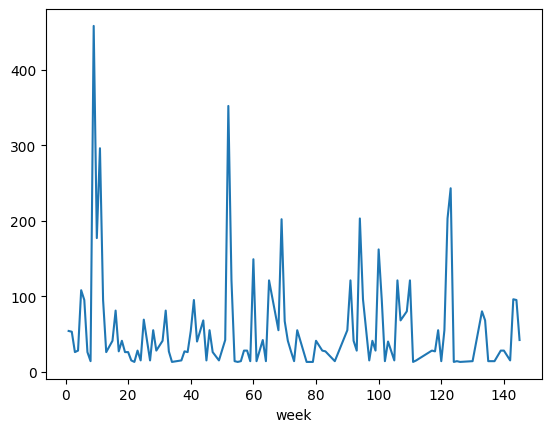

In [53]:
df[idx].set_index("week").num_orders.plot()

In [54]:
df[idx & (df.week == 145)]

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,center_type,op_area,category,cuisine,num_orders_shift_1,num_orders_shift_52,num_orders_rolling_4,num_orders_rolling_16,num_orders_rolling_4_shift_52,num_orders_rolling_16_shift_52
454619,1348583,145,177,1445,727.53,727.53,0,0,42,683,...,TYPE_A,3.4,Seafood,Continental,95.0,41.0,34.25,91.5,74.25,120.0


In [55]:
max_week_index = df[idx & (df.week == 145)].index[0]

In [56]:
max_week_index

454619

In [57]:
X = df_train[df_train.index == max_week_index].drop(columns="num_orders").values

In [58]:
y_pred = reg.predict(X)

In [59]:
y_pred

array([54.67641565])

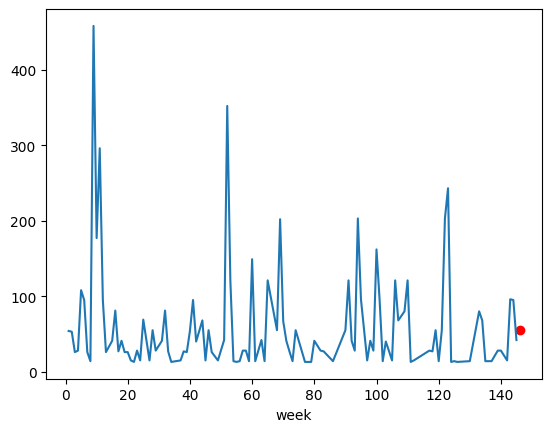

In [60]:

df[idx].set_index("week").num_orders.plot()
plt.scatter([146], y_pred, color="red")